In [45]:
#it is usually good for classifying the species or image recognition
#here we are talking about binary classifications
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [33]:
data = datasets.load_iris()

In [40]:
df = pd.DataFrame(iris.data[:100, :],columns=data.feature_names) #creating new data frame with iris samples' values
df['target']=iris.target[:100] #add new column as species which gain the value from the target value of iris dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df.shape

(100, 5)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df ['target'], random_state=0)

standardize the data, it is like the preprocessing step for having better performance with logistic regression, then fit the training set. why we need to make our data standard and not facing the bias ? here's the link https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [43]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

now we are starting to create our model, like always we create an object from our class. here class is logistic regression and we create an clf object from its. and then train the model on data and learn from data, YaY!

In [46]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

Logistic regression allows you to see the prediction as well as the probability of being correct! Yay! now Let's see one of the nodes prediction of the class which is desire to be and the probability of being in a correct class.
the reason why the model considered class 0 for the first node of our test data is the probability. see, the probability of class 0 occording to the model is roughly 92! however the percentage of being class 1 is 70! so it is going to choose you the greater one.

In [51]:
print('prediction',clf.predict(X_test[0].reshape(-1,1))[0])
print('probability',clf.predict_proba(X_test[0].reshape(-1,1))[0])

prediction 0
probability [0.92902401 0.07097599]


#MORE VISUALIZATION!

In [86]:
ex_df = pd.DataFrame()
ex_df['petal length (cm)'] = X_test.reshape(-1)
ex_df['target'] = y_test.values
ex_df['prediction'] = clf.predict_proba(X_test)[:, 1]  # Corrected this line

ex_df.head()

,petal length (cm),target,prediction
0,-0.893012,0,0.070976
1,1.256319,1,0.987295
2,-1.101012,0,0.037618
3,1.117652,1,0.980281
4,1.048319,1,0.975466


In [89]:
print(ex_df.shape)
ex_df.isnull().sum()

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Check model prediction
predictions = clf.predict(X_test)
print("Predictions:", predictions)

# Check predicted probabilities
predicted_probabilities = clf.predict_proba(X_test)
print("Predicted Probabilities:\n", predicted_probabilities)

(25, 3)
X_test shape: (25, 1)
y_test shape: (25,)
Predictions: [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
Predicted Probabilities:
 [[0.92902401 0.07097599]
 [0.01270463 0.98729537]
 [0.9623822  0.0376178 ]
 [0.01971929 0.98028071]
 [0.02453386 0.97546614]
 [0.22693917 0.77306083]
 [0.9623822  0.0376178 ]
 [0.01270463 0.98729537]
 [0.0158342  0.9841658 ]
 [0.03782958 0.96217042]
 [0.05790299 0.94209701]
 [0.05790299 0.94209701]
 [0.01971929 0.98028071]
 [0.97560538 0.02439462]
 [0.94241445 0.05758555]
 [0.92902401 0.07097599]
 [0.98039317 0.01960683]
 [0.87007832 0.12992168]
 [0.95340533 0.04659467]
 [0.95340533 0.04659467]
 [0.92902401 0.07097599]
 [0.05790299 0.94209701]
 [0.94241445 0.05758555]
 [0.05790299 0.94209701]
 [0.95340533 0.04659467]]


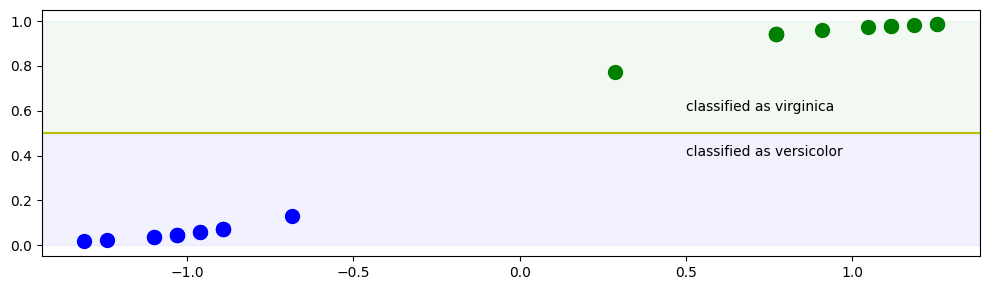

In [94]:
#doesnt show the whole nodes:(
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

virgincaFilter = ex_df['target'] == 1
versiFilter = ex_df['target'] == 0

ax.scatter(ex_df.loc[virgincaFilter, 'petal length (cm)'],
           ex_df.loc[virgincaFilter, 'prediction'],
           color='green',
           s=100,  # Increase marker size
           label='virginica'
           )
ax.scatter(ex_df.loc[versiFilter, 'petal length (cm)'],
           ex_df.loc[versiFilter, 'prediction'],
           color='blue',
           s=100,  # Increase marker size
           label='versicolor'
           )
ax.axhline(y=0.5, c='y')
ax.axhspan(0.5, 1, alpha=0.05, color='green')
ax.axhspan(0, 0.4999, alpha=0.05, color='blue')
ax.text(0.5, 0.6, 'classified as virginica')
ax.text(0.5, 0.4, 'classified as versicolor')

plt.tight_layout()
plt.show()


In [96]:
#measuring the performance of the model

score=clf.score(X_test,y_test) # how to measure the performance of the model! :) easy!
print(score)

1.0


In [97]:
#confusion matrix gives more inside into our model and we can found what was wrong into it
cm= metrics.confusion_matrix(y_test,clf.predict(X_test))

In [99]:
print(cm)

[[13  0]
 [ 0 12]]


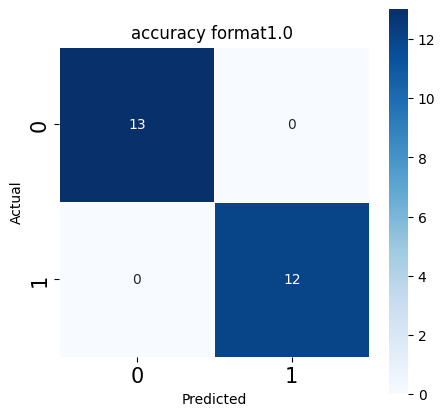

In [111]:
# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
plt.figure(figsize=(5, 5))
sb.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',square=True,linewidths=.5)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('accuracy format{} '.format(score))
plt.tick_params(labelsize=15)
plt.show()